# <font color = salmon> Multiple Agents - Single Function (ie Tool))

## <font color = grey> Deploying Simple App (No Nginx) --> Move all code to Flask App. Only Inference on Page
#### <font color = grey> Conda Env: <font color = pink> Renaming the app (from flask_app) --> <font color = red> flask_app_20240717_v1.00.py

#### <font color = red> Key Admin Tasks

> sudo systemctl daemon-reload

> sudo systemctl restart flaskapp

> sudo systemctl restart nginx
>
> sudo journalctl -u flaskapp -f

> sudo systemctl status flaskapp

> sudo systemctl status nginx

sudo systemctl daemon-reload

sudo systemctl restart flaskapp

sudo systemctl restart nginx

sudo journalctl -u flaskapp -f

sudo systemctl status flaskapp

sudo systemctl status nginx

<font color = tomato>sudo vi /etc/systemd/system/flaskapp.service

<font color = tomato>sudo vi /etc/nginx/sites-available/flaskapp


___
# <font color = blue> Location of Flask Service File

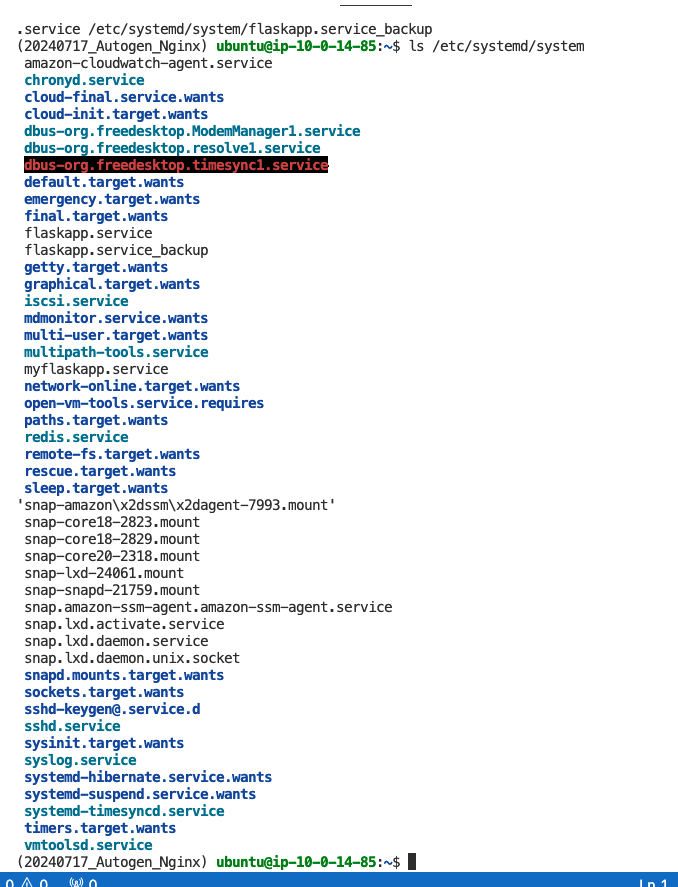

___
# <font color = blue> Deploying with Flask, Nginx and Guincorn
## <font color = tomato> About

**1. Flask Application Setup:**

> File: claude_flask_consl_simple_webpage_v200_20240718.py

>> This file contains your main Flask application code.

>>> Key point: The internal request now uses http://127.0.0.1:8000/predict instead of port 5000.


**2. WSGI File:**

> File: wsgi.py

>> Purpose: Acts as an entry point for the WSGI server (Gunicorn in this case).

>>> It imports your main Flask application and makes it available to Gunicorn.


**3. Gunicorn Setup:**

> Gunicorn is a WSGI HTTP Server for UNIX, designed to serve Python web applications.

>> It's configured to run on port 8000 (http://127.0.0.1:8000).

>>> Gunicorn manages multiple worker processes to handle requests efficiently.


**4. Nginx Configuration:**

> Nginx acts as a reverse proxy, sitting in front of Gunicorn.

>> It listens on port 80 (standard HTTP port) and forwards requests to Gunicorn on port 8000.

>>> This setup allows Nginx to handle static files and SSL termination efficiently.


**5. Systemd Service:**

> A systemd service file is created to manage the Gunicorn process.

>> It ensures that Gunicorn starts automatically on system boot and restarts if it crashes.


**6. Port Usage Explanation:**

> Port 5000: Typically used by Flask's built-in development server. Not used in production.

> Port 8000: Used by Gunicorn to run your Flask app. This is an internal port, not exposed to the internet.

> Port 80: Used by Nginx to receive HTTP requests from the internet.


**7. Why Manual Running is Not Needed:**

> The systemd service automatically starts Gunicorn, which runs your Flask app.

>> Nginx is also running as a service, handling incoming web requests.

>>> This setup allows your application to run continuously without manual intervention.

___
## <font color = tomato> Step-by-Step Deployment Process --> Code

In [ ]:
# # Flask Application Setup (claude_flask_consl_simple_webpage_v200_20240718.py)
# # Ensure this file contains your main Flask application code
# # Key point: Internal requests use http://127.0.0.1:8000/predict

# # WSGI File Setup (wsgi.py)
# import sys
# import os
# sys.path.insert(0, os.path.dirname(__file__))
# from claude_flask_consl_simple_webpage_v200_20240718 import app
# if __name__ == "__main__":
#     app.run()

# # Install Gunicorn
# pip install gunicorn

# # Create Systemd Service File
# sudo nano /etc/systemd/system/flaskapp.service

# # Content of flaskapp.service:
# """
# [Unit]
# Description=Gunicorn instance to serve flask app
# After=network.target

# [Service]
# User=ubuntu
# Group=www-data
# WorkingDirectory=/path/to/your/app
# Environment="PATH=/path/to/your/virtualenv/bin"
# ExecStart=/path/to/your/virtualenv/bin/gunicorn --workers 3 --bind 127.0.0.1:8000 wsgi:app

# [Install]
# WantedBy=multi-user.target
# """

# # Start and Enable Flask App Service
# sudo systemctl start flaskapp
# sudo systemctl enable flaskapp

# # Install and Configure Nginx
# sudo apt install nginx
# sudo nano /etc/nginx/sites-available/flaskapp

# # Nginx configuration:
# """
# server {
#     listen 80;
#     server_name your_domain_or_ip;

#     location / {
#         proxy_pass http://127.0.0.1:8000;
#         proxy_set_header Host $host;
#         proxy_set_header X-Real-IP $remote_addr;
#     }
# }
# """

# # Enable Nginx Configuration
# sudo ln -s /etc/nginx/sites-available/flaskapp /etc/nginx/sites-enabled
# sudo nginx -t
# sudo systemctl restart nginx

# # Configure Firewall (if applicable)
# # Ensure port 80 is open for incoming HTTP traffic

# # Test the Application
# # Access your application via web browser using your domain or IP address

# # Monitoring and Logs
# # Check Gunicorn logs: sudo journalctl -u flaskapp -f
# # Check Nginx logs: sudo tail -f /var/log/nginx/error.log

# # Port Usage:
# # - Port 5000: Not used in production (typically Flask's development server)
# # - Port 8000: Used by Gunicorn to run Flask app (internal, not exposed to internet)
# # - Port 80: Used by Nginx to receive HTTP requests from the internet

# # Note: Manual running of the Flask app is not needed as the systemd service
# # automatically starts Gunicorn, which runs your Flask app. Nginx handles
# # incoming web requests, creating a production-ready environment.

___
## <font color = tomato> Step-by-Step Deployment Process

**1. Prepare the Flask Application:**

* Ensure claude_flask_consl_simple_webpage_v200_20240718.py is in the correct directory.
* Verify that internal requests use http://127.0.0.1:8000/predict.


**2. Set up the WSGI File:**

* Create wsgi.py in the same directory as your Flask app.
* Ensure it correctly imports your Flask application.

**3. Install Gunicorn:**

> 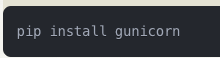

**4. Create a Systemd Service File:**

> 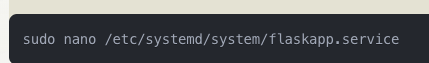
> 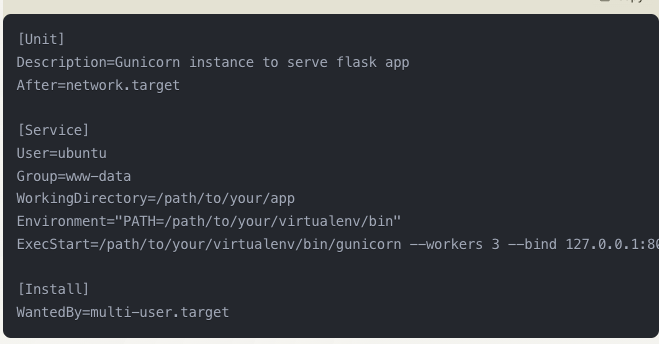

**5. Start and Enable the Flask App Service:**
> 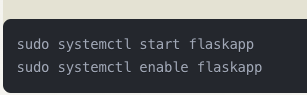>

**6. Install and Configure Nginx:**
> 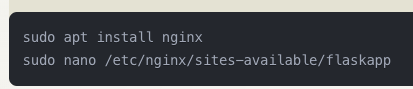>
> 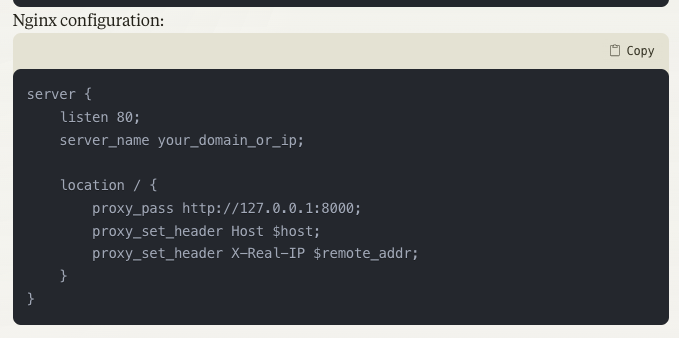

**7. Enable the Nginx Configuration:**
> 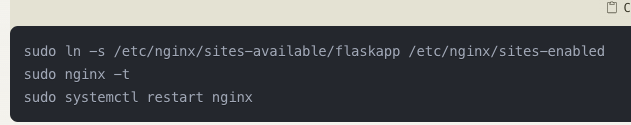

**8. Configure Firewall (if applicable):**
> Ensure port 80 is open for incoming HTTP traffic.


**9. Test the Application:**
> Access your application via web browser using your domain or IP address.


**10. Monitoring and Logs:**
> Check Gunicorn logs: sudo journalctl -u flaskapp -f

> Check Nginx logs: sudo tail -f /var/log/nginx/error.log

___
# <font color = blue> Archive

---

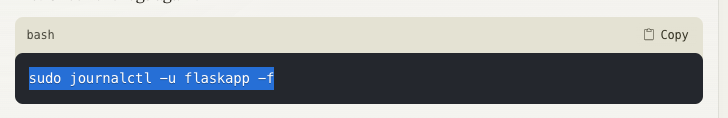

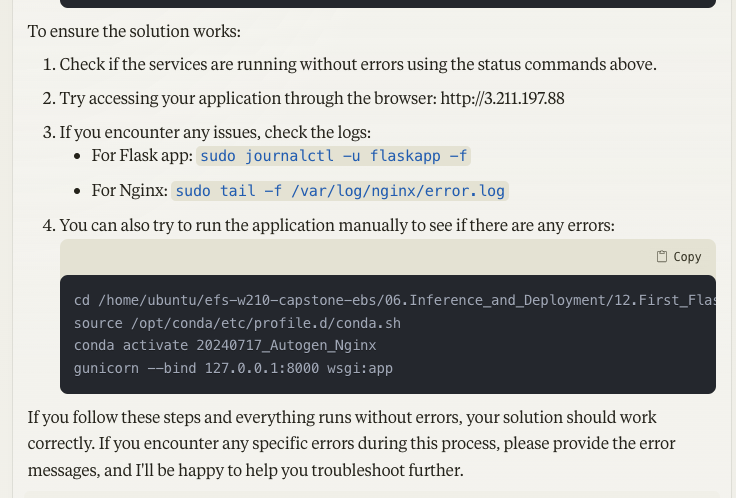

### <font color = Olive> Admin

#### <font color = darkgrey> Imports

In [1]:
# ############################## Imports & Display Options ###############################################

# import pandas as pd
# import os
# import gzip
# import time
# import warnings
# import os
# import shutil
# import os
# import autogen


# from datetime import datetime
# # Set display option to show the full length of the column
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# warnings.filterwarnings("ignore")

# ########################### Set Base Directory #########################################################

# # Determine the base directory based on the effective user ID
# if os.geteuid() == 0:  # root user
#     base_dir = '/root'
# else:
#     base_dir = '/home/sagemaker-user'

# # Set the environment variable
# os.environ['BASE_DIR'] = base_dir

# # Verify the base directory
# print(f"Base directory set to: {base_dir}")

# ################################# Set Working Directory ##############################################

# # target_directory = os.path.join(base_dir, '/mnt/efs-w210-capstone/200015/12.Agents_TOI_AutoGen')

# target_directory = os.path.join(base_dir, '/home/ubuntu/efs-w210-capstone-ebs/12.Agents_TOI_AutoGen/20240629_06.Tool_Use/')

# # efs-w210-capstone/200015/12.Agents_TOI_AutoGen/20240629_02.Multi-Agent Collaboration (>3 Agents)

# # # Change to the target directory
# os.chdir(target_directory)
# print(f"Changed directory to: {os.getcwd()}")

# ################################### Set API Keys #####################################################

# os.environ['OPENAI_API_KEY'] = 'sk-proj-iQtcgUJOOf4n53Bs6uyqT3BlbkFJnEIqUeEwXjbjVMcDVqiz'

# ################################# Check Agent Setup - Sample ##########################################

# from autogen import ConversableAgent

# config_list = [
#     {"model": "gpt-4o", "api_key": os.environ.get("OPENAI_API_KEY"), "api_type": "openai"},
#     {"model": "gpt-4-turbo-preview", "api_key": os.environ.get("OPENAI_API_KEY"), "api_type": "openai"},
#     {"model": "gpt-4", "api_key": os.environ.get("OPENAI_API_KEY"), "api_type": "openai"},
#     {"model": "gpt-4-0314", "api_key": os.environ.get("OPENAI_API_KEY"), "api_type": "openai"},
#     {"model": "gpt4", "api_key": os.environ.get("OPENAI_API_KEY"), "api_type": "openai"},
#     {"model": "gpt-4-32k", "api_key": os.environ.get("OPENAI_API_KEY"), "api_type": "openai"},
#     {"model": "gpt-4-32k-0314", "api_key": os.environ.get("OPENAI_API_KEY"), "api_type": "openai"},
#     {"model": "gpt-4-32k-v0314", "api_key": os.environ.get("OPENAI_API_KEY"), "api_type": "openai"}
# ]

# llm_config={
#     # "request_timeout": 600,
#     "seed": 42,
#     "config_list": config_list,
#     "temperature": 0
# }

# # agent = ConversableAgent(
# #     "chatbot",
# #     llm_config={"config_list": [{"model": "gpt-4", "api_key": os.environ.get("OPENAI_API_KEY")}]},
# #     code_execution_config=False,  # Turn off code execution, by default it is off.
# #     function_map=None,  # No registered functions, by default it is None.
# #     human_input_mode="NEVER",  # Never ask for human input.
# # )

# # reply = agent.generate_reply(messages=[{"content": "Tell me a joke.", "role": "user"}])
# # print(reply)


# ################################# Tools Setup ##########################################

# os.environ["SERPAPI_API_KEY"] = "6d6dd5330f69328aabc9a71bfd69477819748a56"


# ###################################### REFERENCE ONLY --> DOES NOT WORK FOR SINGLE CHATS #############

# # for i, chat_res in enumerate(chat_results):
# #     print(f"*****{i}th chat*******:")
# #     print(chat_res.summary)
# #     print("Human input in the middle:", chat_res.human_input)
# #     print("Conversation cost: ", chat_res.cost)
# #     if i == 1:
# #         assert (
# #             len(chat_res.chat_history) == 4
# #         ), f"The chat history should contain at most 4 messages because max_turns is set to 2 in the {i}-th chat."
# #     print("\n\n")

# # # Get the chat history.
# # import pprint

# # pprint.pprint(reply.chat_history)

# # # Get the cost of the chat.
# # pprint.pprint(reply.cost)

In [2]:
# import autogen
# from typing import Literal
# from pydantic import BaseModel, Field
# from typing_extensions import Annotated
# import requests
# from autogen.cache import Cache

## <font color = coral> 4 Files

> 1 .py and 2 html files

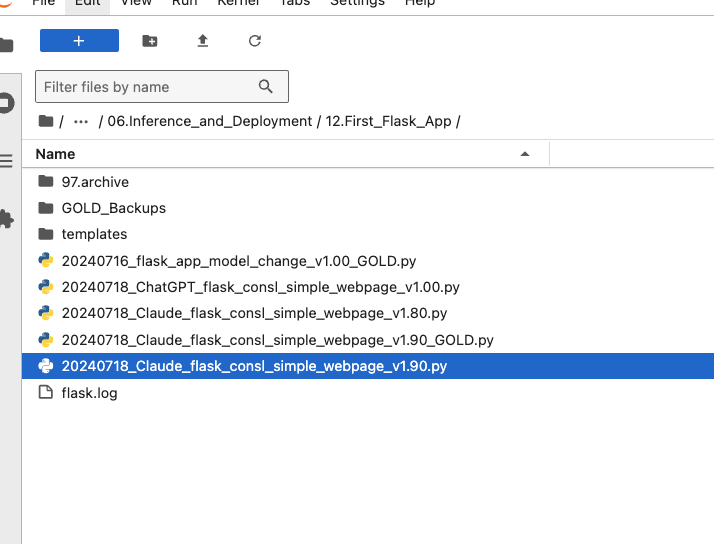

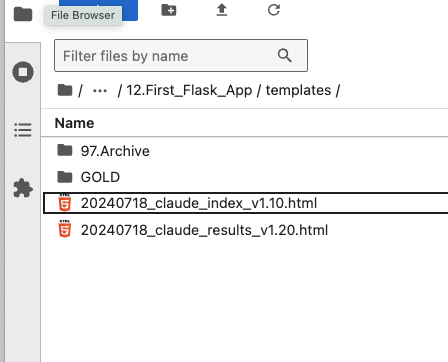

#### <font color = grey>v1.90

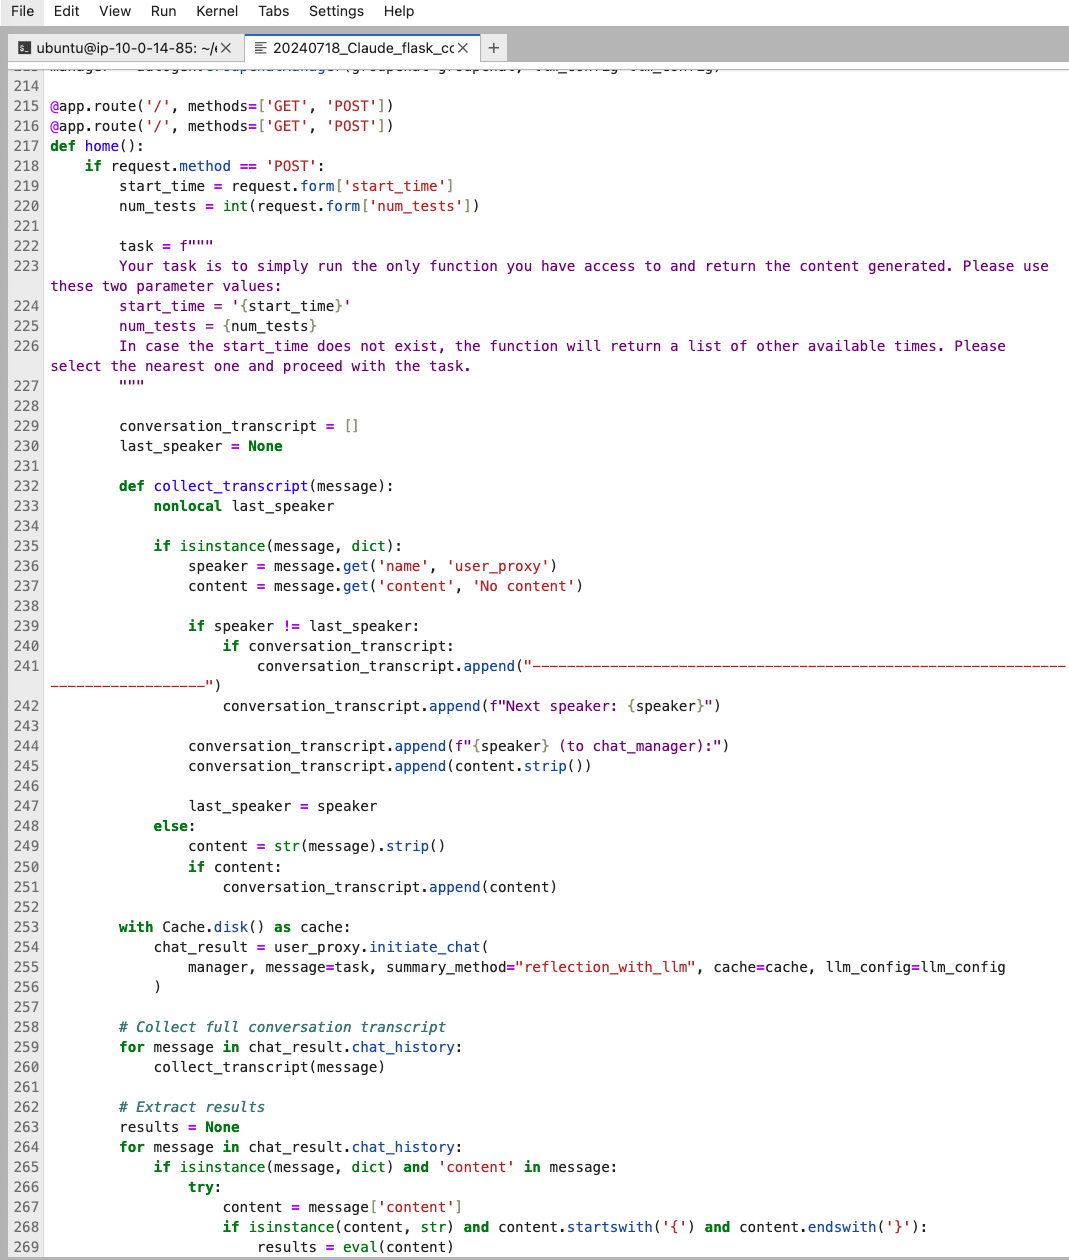

#### wsgi.py

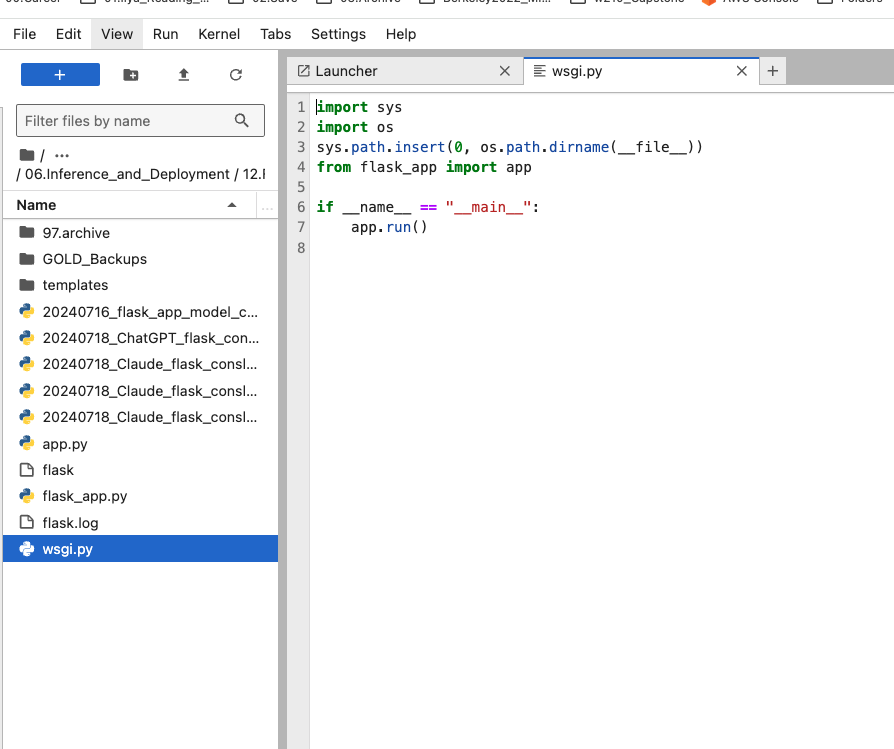

---

# <font color = teal> Key Concepts

### Nginx: 
> A web server that can also act as a reverse proxy, load balancer, and HTTP cache. It's efficient at handling static content and proxying requests to application servers.
### Reverse Proxy: 
> A server that sits in front of web servers and forwards client requests to those web servers. It provides an additional level of abstraction and control to ensure the smooth flow of network traffic between clients and servers.
### Gunicorn: 
> A Python WSGI HTTP Server for UNIX. It's a pre-fork worker model, which means it can handle multiple requests simultaneously by using multiple worker processes.
### systemd: 
> An init system and system manager that is widely used in Linux distributions to manage system services and resources.
### WSGI: 
> A specification that describes how a web server communicates with web applications. It's a standard interface between web servers and Python web frameworks/applications.

In [2]:
########################## 1. Prepare the Flask Application: ##########################

# Ensure your Flask app is in the correct directory (/home/ubuntu/efs-w210-capstone-ebs/06.Inference_and_Deployment/12.First_Flask_App)
# Rename the main Flask app file to flask_app.py
# We renamed the existing Flask application file to flask_app.py because Python module names cannot start with a number. This was a crucial step to resolve the "ModuleNotFoundError" we encountered earlier.
# The original file name (which started with a date, like "20240718_...") was causing issues when trying to import it as a module.
# Renaming it to flask_app.py not only solved the import issue but also follows a more conventional naming pattern for Flask applications.


########################### 2. Create a WSGI file: ##########################

# Create a file named wsgi.py in the same directory as flask_app.py
# Add the following content:

# ---------------------> CODE below <--------------------------
# import os
# sys.path.insert(0, os.path.dirname(__file__))
# from flask_app import app

# if __name__ == "__main__":
#     app.run()

########################### 3. Set up Gunicorn: ##########################

# Install Gunicorn in your conda environment:

# ---------------------> CODE below <--------------------------

# conda activate 20240717_Autogen_Nginx
# pip install gunicorn


########################### 4. Create a systemd service file for the Flask app: ##########################

# Create /etc/systemd/system/flaskapp.service with the following content:

# ---------------------> CODE below <--------------------------
# [Unit]
# Description=Gunicorn instance to serve flask app
# After=network.target

# [Service]
# User=ubuntu
# Group=www-data
# WorkingDirectory=/home/ubuntu/efs-w210-capstone-ebs/06.Inference_and_Deployment/12.First_Flask_App
# Environment="PATH=/opt/conda/envs/20240717_Autogen_Nginx/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin"
# Environment="PYTHONPATH=/home/ubuntu/efs-w210-capstone-ebs/06.Inference_and_Deployment/12.First_Flask_App"
# ExecStart=/bin/bash -c 'source /opt/conda/etc/profile.d/conda.sh && conda activate 20240717_Autogen_Nginx && exec /opt/conda/envs/20240717_Autogen_Nginx/bin/gunicorn --workers 3 --bind 127.0.0.1:8000 wsgi:app'

# [Install]
# WantedBy=multi-user.target

########################### 5. Start and enable the Flask app service: ##########################

# ---------------------> CODE below <--------------------------
# sudo systemctl start flaskapp
# sudo systemctl enable flaskapp

########################### 6. Install and configure Nginx: ##########################

# Install Nginx: sudo apt install nginx
# Create a new Nginx server block:

# ---------------------> CODE below <--------------------------
# sudo nano /etc/nginx/sites-available/flaskapp

# Add the following content:
# ---------------------> CODE below <--------------------------
# server {
#     listen 80;
#     server_name 3.211.197.88;

#     location / {
#         proxy_pass http://127.0.0.1:8000;
#         proxy_set_header Host $host;
#         proxy_set_header X-Real-IP $remote_addr;
#     }
# }

# Enable the Nginx server block:
# ---------------------> CODE below <--------------------------
# sudo ln -s /etc/nginx/sites-available/flaskapp /etc/nginx/sites-enabled


########################### 7. Start and enable Nginx: ##########################
# ---------------------> CODE below <--------------------------
# sudo systemctl start nginx
# sudo systemctl enable nginx

########################### 8. Configure EC2 Security Group: ##########################

# Open inbound traffic for HTTP (port 80) in your EC2 instance's security group


########################### 9. Restart services: ##########################
# ---------------------> CODE below <--------------------------
# sudo systemctl daemon-reload
# sudo systemctl restart flaskapp
# sudo systemctl restart nginx

########################### 10. Verify the setup: ##########################

# Check the status of both services:
# ---------------------> CODE below <--------------------------
# sudo systemctl status flaskapp
# sudo systemctl status nginx

# Access the application via http://3.211.197.88

########################### 11. Check Flask Logs ##########################

# sudo journalctl -u flaskapp -f


# <font color = teal> Steps Followed - Detail

### <font color = blue> Step 1. Copy orig file and rename to flask_app.py
> This is because the app name cannot start with a number. This step ensures your Flask app is properly organized and named. It's about structuring your application for deployment.

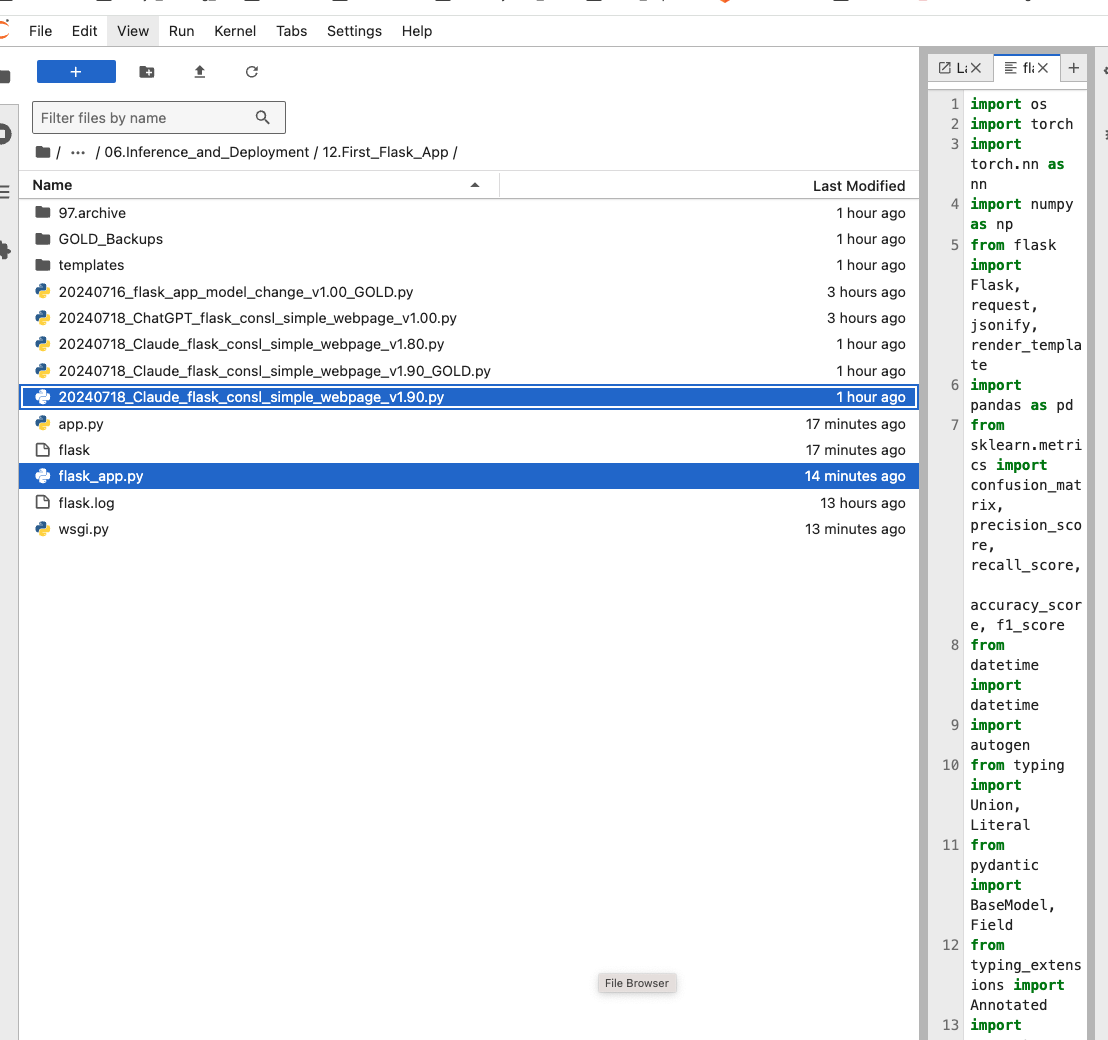

### <font color = blue> Step 2. Create wsgi.py file
> Create a file named wsgi.py in the same directory as flask_app.py
>
> WSGI (Web Server Gateway Interface) is a standard interface between web servers and Python web applications. This file acts as a bridge between your Flask app and the Gunicorn server.
> 
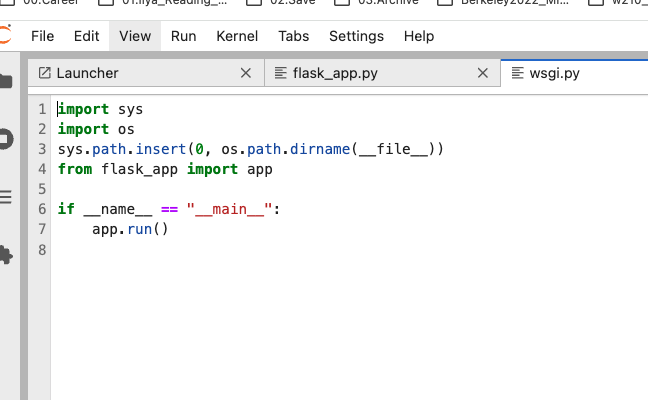

### <font color = blue> Step 3. Set up Gunicorn
> Install Gunicorn in your conda environment:
>
> Gunicorn is a WSGI HTTP Server for UNIX. It's more robust than Flask's built-in server and is suitable for production environments. It can handle multiple simultaneous requests efficiently.
> 

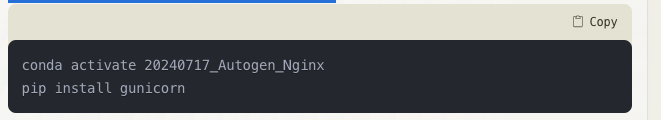

### <font color = blue> Step 4. Create a systemd service file for the Flask app
> Create /etc/systemd/system/flaskapp.service with the following content
>
> systemd is an init system used in many Linux distributions to manage system processes. This file tells the system how to start, stop, and manage your Flask application as a background service.
> 

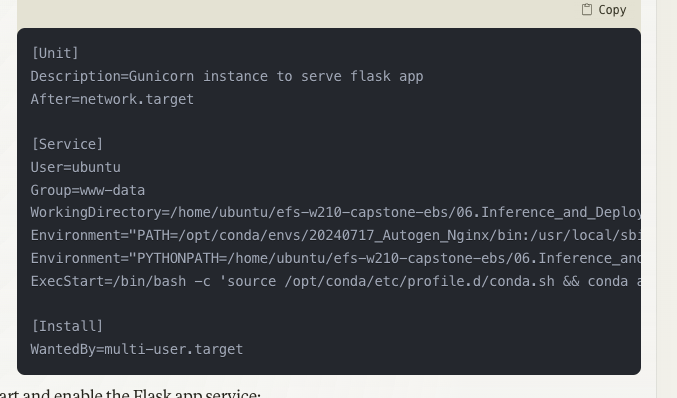

[Unit]
Description=Gunicorn instance to serve flask app
After=network.target

[Service]
User=ubuntu
Group=www-data
WorkingDirectory=/home/ubuntu/efs-w210-capstone-ebs/06.Inference_and_Deployment/12.First_Flask_App
Environment="PATH=/opt/conda/envs/20240717_Autogen_Nginx/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin"
Environment="PYTHONPATH=/home/ubuntu/efs-w210-capstone-ebs/06.Inference_and_Deployment/12.First_Flask_App"
ExecStart=/bin/bash -c 'source /opt/conda/etc/profile.d/conda.sh && conda activate 20240717_Autogen_Nginx && exec /opt/conda/envs/20240717_Autogen_Nginx/bin/gunicorn --workers 3 --bind 127.0.0.1:8000 wsgi:app'

[Install]
WantedBy=multi-user.target

### <font color = blue> Step 5. Start and enable the Flask app service:
> Create /etc/systemd/system/flaskapp.service with the following content
>
> This step activates your Flask app as a system service, ensuring it starts automatically when the server boots up.

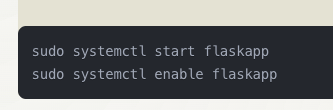

### <font color = blue> Step 6. Install and configure Nginx:
> Install Nginx: sudo apt install nginx
>
> Nginx is a powerful web server and reverse proxy. It can handle static files efficiently and proxy requests to your Flask app. This configuration tells Nginx how to route incoming web requests.
> 

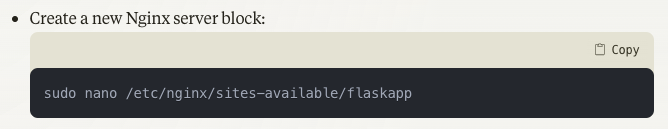

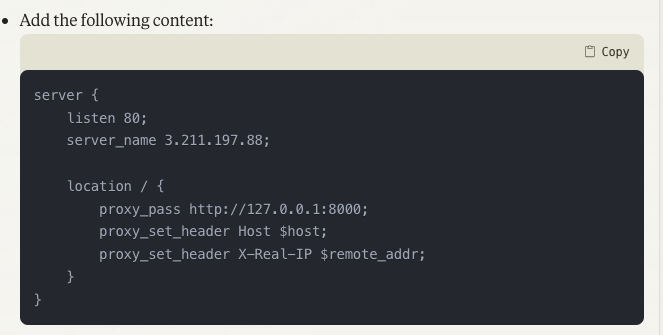

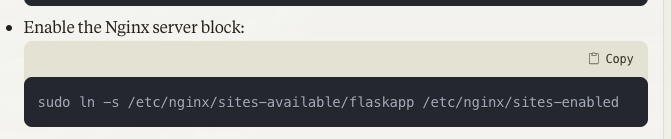

### <font color = blue> Step 7. Start and enable Nginx:
> Similar to step 5, this activates Nginx as a system service.

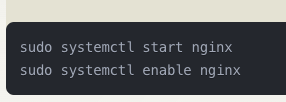

### <font color = blue> Step 8. Configure EC2 Security Group:

> Open inbound traffic for HTTP (port 80) in your EC2 instance's security group
>
> Security groups act as a firewall for your EC2 instances. This step allows incoming HTTP traffic to reach your server.

### <font color = blue> Step 9. Restart Service:
>
>This ensures all recent changes are applied and services are running with the latest configurations.
>

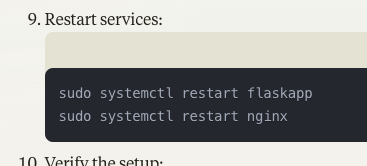

### <font color = blue> Step 10. Verify Setup
>
>This final step checks that everything is running correctly and the application is accessible.
>
>
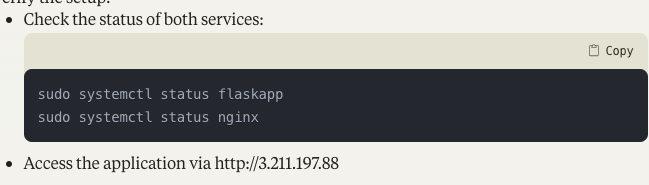

# <font color = tomato> Inference --> Use Case 1: Default Parameters (Hardcoded)
### <font color = blue> To move the solution to the public IP of the ec2 vm

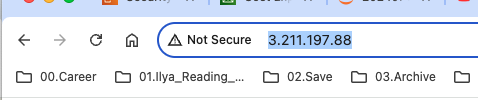

#### index.html
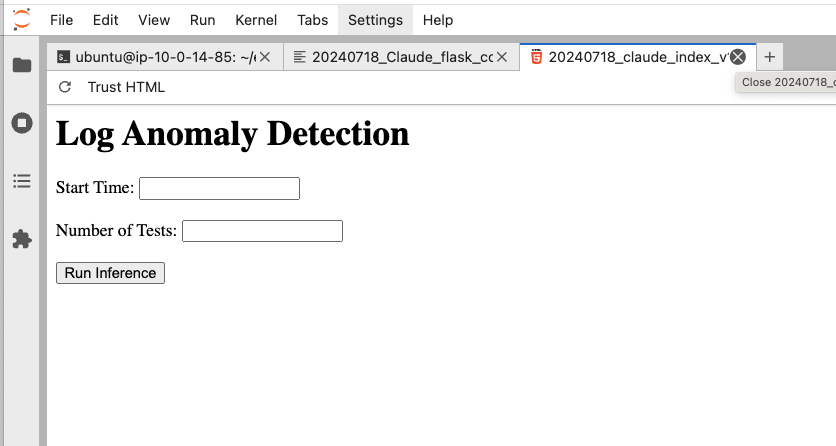

#### results.html
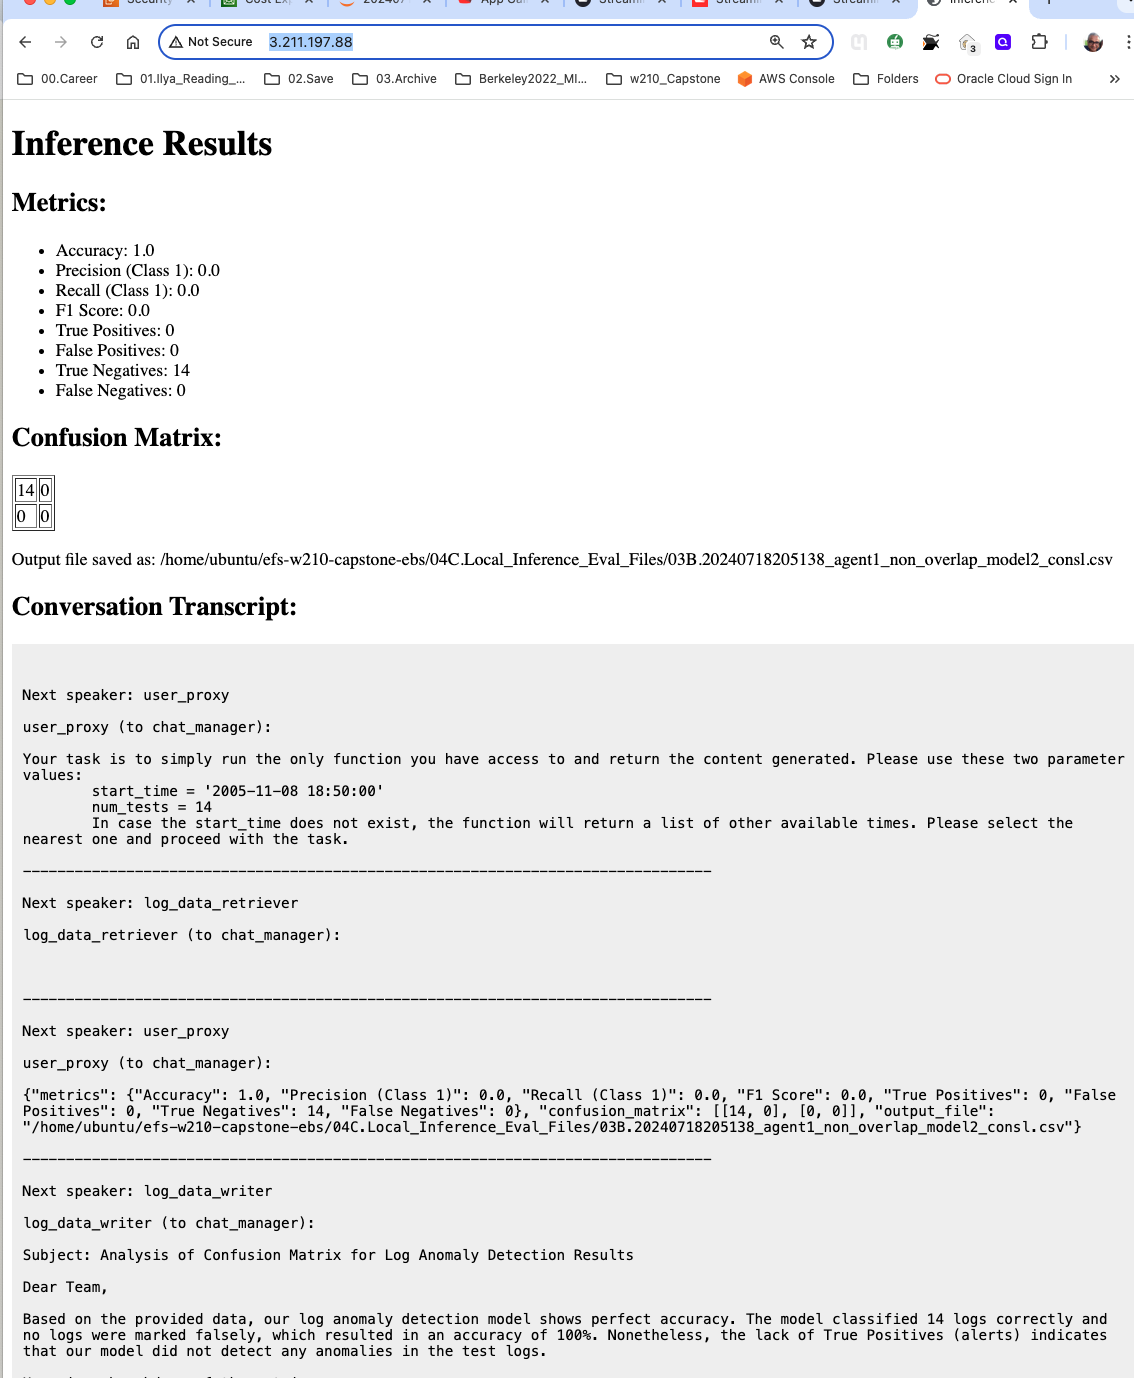

---

### <font color = blue> Check Flask Transcript

##### <font color = tomato> Matches with the results.html output

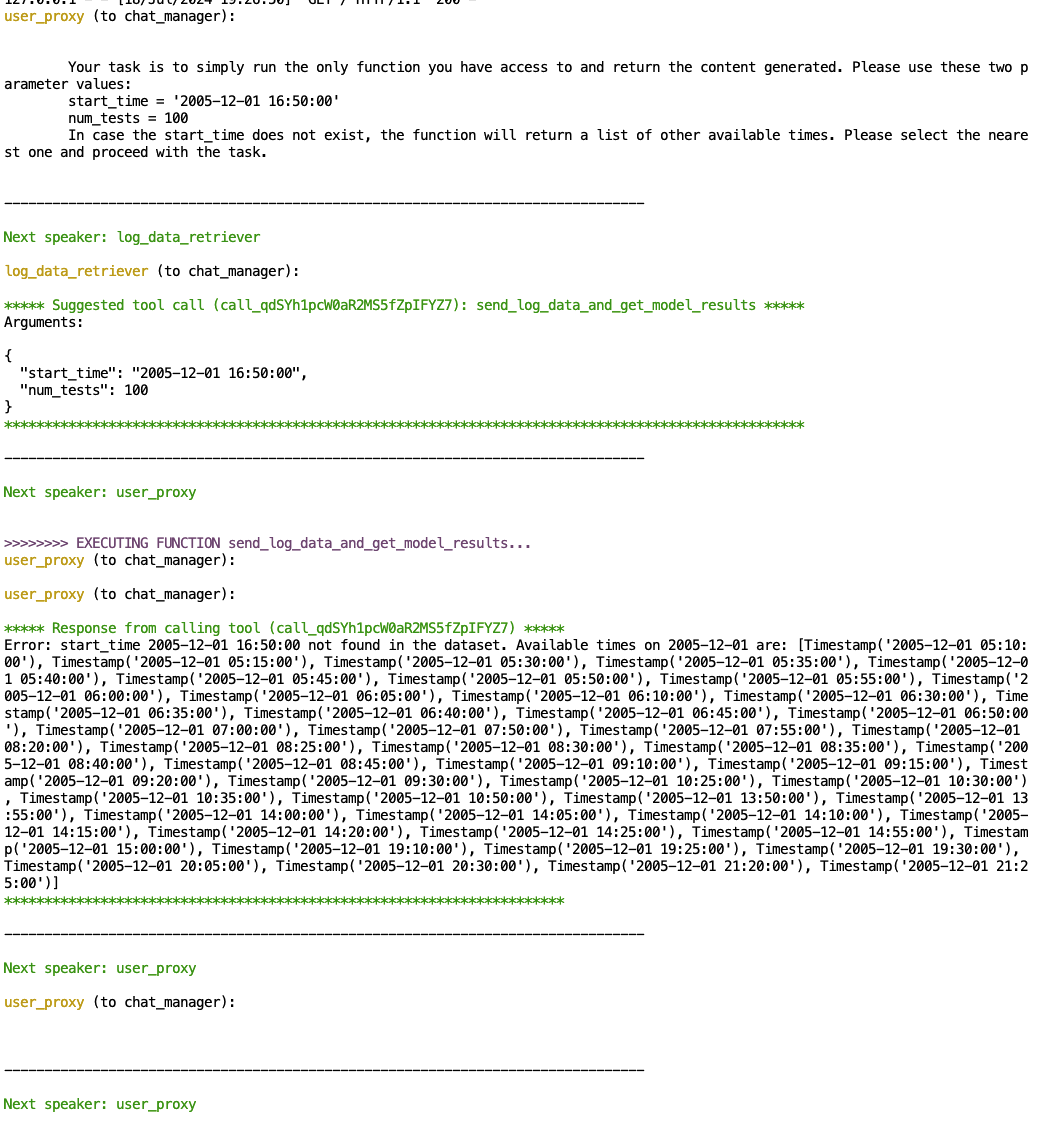

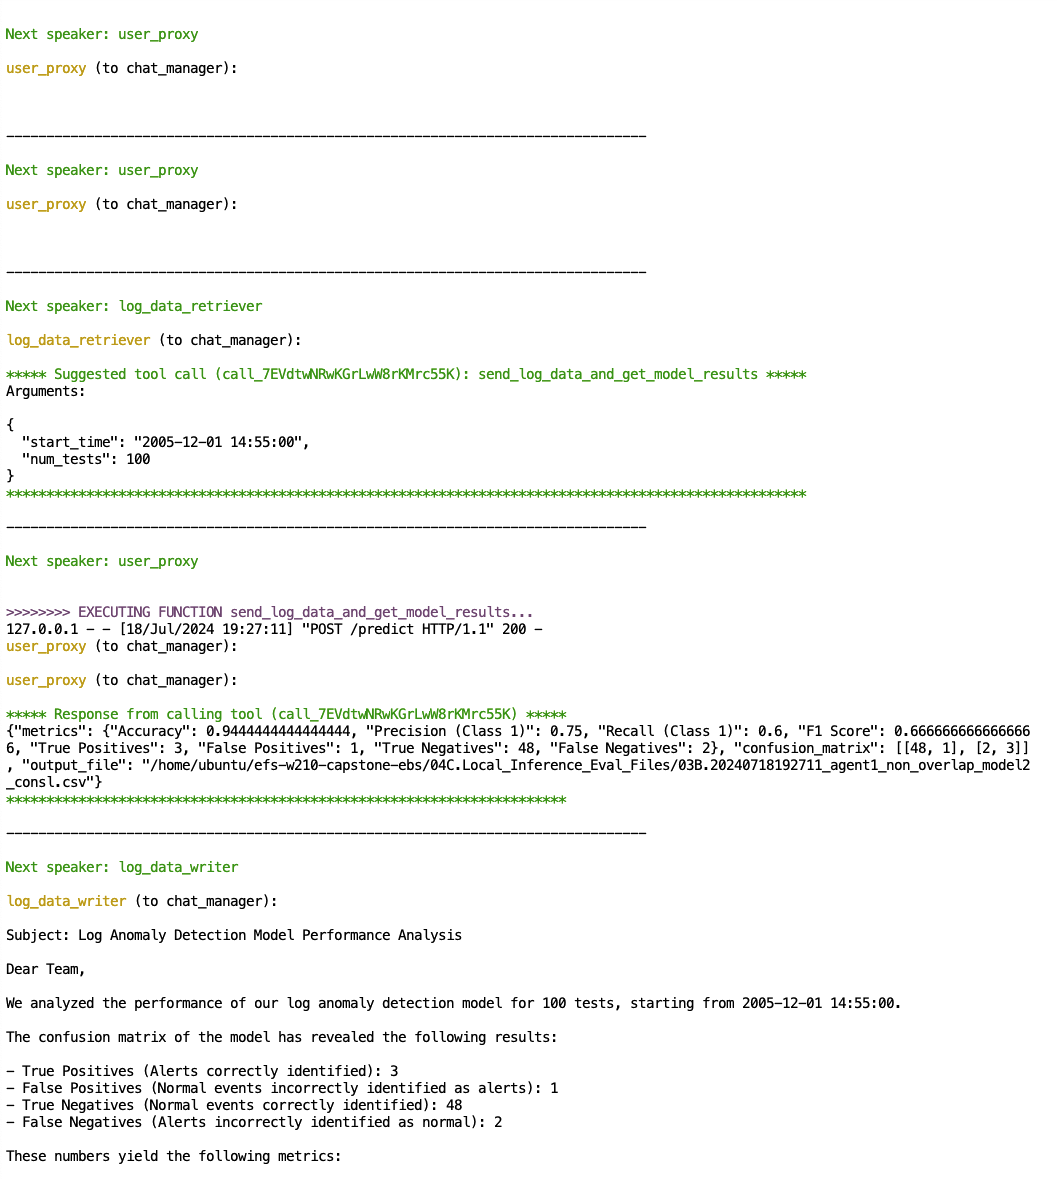

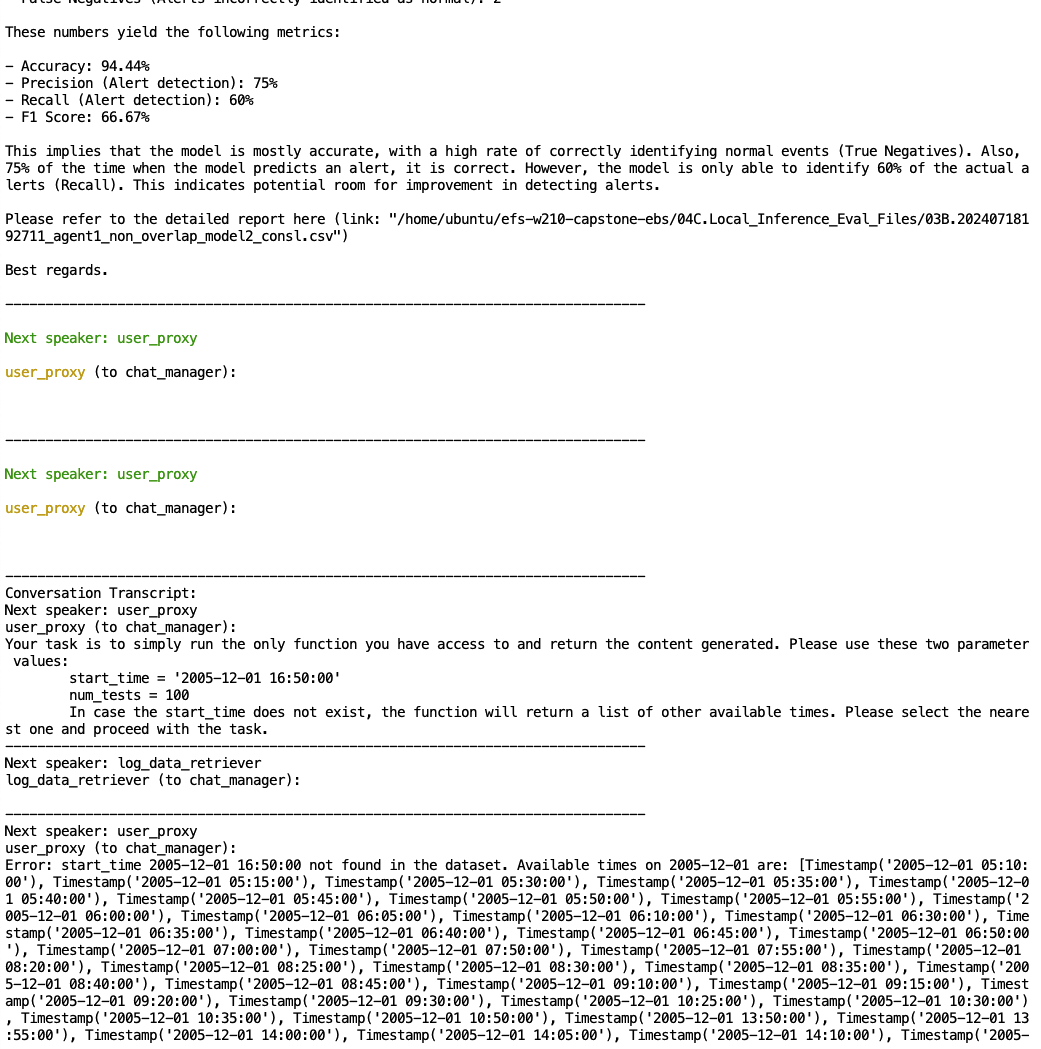